# Analyzing Crime in Los Angeles

This is an analysis of all crimes committed in the city of Los Angeles since February 2020, purposely to support the Los Angeles Police Department (LAPD) to identify patterns in criminal behavior and to use the analytics to plan and allocate resources efficiently to tackle various crimes in different areas. 


                                                                                Analysis done by Philip Mwema
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime.

### About the Crime in Los Angeles Dataset
This data is provided by Los Angeles Police Department, and can be accessed publicly on [LAPD OpenData's website.](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8)  
The Los Angeles Crime dataset was created in February 11, 2020.  
This is a recently updated data as of August 30, 2023 with a weekly refresh rate every Wednesday and has 28 columns and a total of 788,767 entries whereby each row represnts a crime incident reported to a police station in Los Angeles.

In [197]:
#Importing Libraries to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Data Ingestion and Assessment

In [198]:
#Reading data from csv

data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [199]:
data.sample()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
384288,210116337,09/05/2021 12:00:00 AM,09/01/2021 12:00:00 AM,1935,1,Central,162,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,800 S OLIVE ST,NaN,34.0437,-118.2582


In [200]:
data.shape

(788767, 28)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788767 entries, 0 to 788766
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           788767 non-null  int64  
 1   Date Rptd       788767 non-null  object 
 2   DATE OCC        788767 non-null  object 
 3   TIME OCC        788767 non-null  int64  
 4   AREA            788767 non-null  int64  
 5   AREA NAME       788767 non-null  object 
 6   Rpt Dist No     788767 non-null  int64  
 7   Part 1-2        788767 non-null  int64  
 8   Crm Cd          788767 non-null  int64  
 9   Crm Cd Desc     788767 non-null  object 
 10  Mocodes         680162 non-null  object 
 11  Vict Age        788767 non-null  int64  
 12  Vict Sex        685415 non-null  object 
 13  Vict Descent    685407 non-null  object 
 14  Premis Cd       788758 non-null  float64
 15  Premis Desc     788300 non-null  object 
 16  Weapon Used Cd  274517 non-null  float64
 17  Weapon Des

#### Metadata
1. ``DR_NO``           - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
2. ``Date Rptd``       - Date reported - MM/DD/YYYY.
3. ``DATE OCC``        - Date of occurence - MM/DD/YYYY.
4. ``TIME OCC``        - Time of occurence in 24 hour military time.
5. ``AREA``            - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic                            Areas are sequentially numbered from 1-21.
6. ``AREA NAME``       - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the                              surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of                       South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
7. ``Rpt Dist No``     - A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it                          occurred in for statistical comparisons. Find LAPD Reporting Districts on the;                                                                [LA City GeoHub](http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab)
8. ``Part 1-2 ``
9. ``Crm Cd``          - Indicates the crime committed. (Same as Crime Code 1)
10. ``Crm Cd Desc``    - Defines the Crime Code provided.
11. ``Mocodes``        - Modus Operandi: Activities associated with the suspect in commission of the crime
12. ``Vict Age``       - Victim Age (years)
13. ``Vict Sex``       - Victim's Sex: F: Female, M: Male, X: Unknown.
14. ``Vict Descent``   - Victim's Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H -                                    Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific                          Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
15. ``Premis Cd``      - The type of structure, vehicle, or location where the crime took place.
16. ``Premis Desc``    - Defines the Premise Code provided.
17. ``Weapon Used Cd`` - The type of weapon used in the crime.
18. ``Weapon Desc``    - Defines the Weapon Used Code provided.
19. ``Status``         - Status of the case. (IC is the default)
20. ``Status Desc``    - Defines the Status Code provided.
21. ``Crm Cd 1``       - Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
22. ``Crm Cd 2``       - May contain a code for an additional crime, less serious than Crime Code 1.
23. ``Crm Cd 3``       - May contain a code for an additional crime, less serious than Crime Code 1.
24. ``Crm Cd 4``       - May contain a code for an additional crime, less serious than Crime Code 1.
25. ``LOCATION``       - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
26. ``Cross Street``   - Cross Street of rounded Address
27. ``LAT``            - Latitude
28. ``LON``            - Longtitude

#### From the data inspection we can see a few errors in the dataset that needs cleaning, i.e
* Unnecessary Columns for our analysis, i.e - ``Part 1-2 ``,``Mocodes``,``Cross Street``
* Wrongly types columns, i.e - Date Rptd and DATE OCC should be typed as ``datetime``
* Null values in various columns, i.e - ``Vict Sex``,``Vict Descent``,``Premis Cd``,``Premis Desc``, ``Weapon Used Cd``,``Weapon Desc``,``Crm Cd 2``,``Crm Cd 2``,``Crm Cd 3`` and ``Crm Cd 4``
* Age column (``Vict Age``) has outliers i.e values under 0 (-1, -2, -3) and 0 itself which is not normal for a victims age.
* ``Vict Sex`` and ``Vict Descent`` Columns has been asserted with abbreviations which we'll need to replace with full names for easier understanding

### Data Cleaning

In [202]:
#Dropping Unnecessary Columns:

data.drop(columns = ['Part 1-2', 'Mocodes', 'Cross Street'], inplace = True)

In [203]:
#Testing:
data.columns

#The three columns have now been removed.

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [204]:
#Assigning the correct types to columns:

data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['Date Rptd'])

In [205]:
#Testing

print(data['Date Rptd'].dtype)
print(data['DATE OCC'].dtype)

#Date Reorted and Date Occurred are now typed correctly as datetime

datetime64[ns]
datetime64[ns]


In [206]:
#Dealing with Null Values
#Victim Sex

print(data['Vict Sex'].isnull().sum()) #Number of missing(null) values
print(data['Vict Sex'].isnull().sum()/data['DR_NO'].count() * 100) #Percentage of the missing data compared to the whole dataset 

103352
13.102982249510944


In [207]:
#Dealing with Null Values
#Victim Descent

print(data['Vict Descent'].isnull().sum()) #Number of missing(null) values
print(data['Vict Descent'].isnull().sum()/data['DR_NO'].count() * 100) #Percentage of the missing data compared to the whole dataset 

103360
13.103996490725397


In [208]:
#Dealing with Null Values
#Premises

print(data['Premis Cd'].isnull().sum()) #Number of missing(null) values
print(data['Premis Cd'].isnull().sum()/data['DR_NO'].count() * 100) #Percentage of the missing data compared to the whole dataset 

9
0.001141021366258984


In [209]:
#Dealing with Null Values
#Weapon Used

print(data['Weapon Used Cd'].isnull().sum()) #Number of missing(null) values
print(data['Weapon Used Cd'].isnull().sum()/data['DR_NO'].count() * 100) #Percentage of the missing data compared to the whole dataset 

514250
65.19669306652027


> **From the above assessment of null values on usable columns, there will be no need to drop columns that has nulls in these columns as this will affect the general intergrity of the total number of entries as each entry represents a crime reported.**
> **These nulls seems to have risen from omission during entry or capture of these records on a row basis.**

In [210]:
#Dealing with Victims Age Outliers
data['Vict Age'].value_counts().sort_values()

-3           1
 120         1
-2          12
-1          55
 97         59
         ...  
 31      17266
 29      17283
 35      17623
 30      18041
 0      193500
Name: Vict Age, Length: 103, dtype: int64

In [211]:
#Dealing with Victims Age Outliers

print((data['Vict Age'] == 0).sum())
print((data['Vict Age'] == 0).sum()/data['DR_NO'].count() * 100) #Percentage of Zero Ages in the dataset

193500
24.531959374568153


###### Since Age of a victim cannot have negatives and zero since it's not natural, we're going to replace these values with empty to avoid disrupting the intergrity of the whole data, i.e 0 entries has 193,500 entries which is 24.5% of the whole dataset. This unnatural age data seems to have been erroneusly entered or ommitted in the original data collection. 

In [212]:
data['Vict Age'] = data['Vict Age'].replace(0, )
data['Vict Age'] = data['Vict Age'].replace(-1, )
data['Vict Age'] = data['Vict Age'].replace(-2, )
data['Vict Age'] = data['Vict Age'].replace(-3, )

In [213]:
#Testing

data['Vict Age'].value_counts().sort_values()

120        1
98        79
97        83
95       102
96       104
       ...  
28     22516
29     22888
31     23026
35     23371
30     24047
Name: Vict Age, Length: 99, dtype: int64

In [214]:
#Replacing Abbreviation with full names in Vict Sex

data['Vict Sex'].replace({'M': 'Male', 'F': 'Female', 'X': 'Unknown', 'H': 'Unknown', '-': 'Unknown'}, inplace = True)

In [215]:
#Replacing Abbreviation with full names in Vict Descent

data['Vict Descent'].replace({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian',
                                                         'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican',
                                                         'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean',
                                                         'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan',
                                                         'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown',
                                                         'Z': 'Asian Indian'}
                                                        , inplace = True)

In [216]:
data.sample(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
227713,211606108,2021-03-14,2021-03-14,2300,16,Foothill,1612,903,CONTEMPT OF COURT,48,...,NaN,IC,Invest Cont,903.0,NaN,NaN,NaN,11200 DE GARMO AV,34.2736,-118.4145
713812,231215643,2023-07-13,2023-07-13,2045,12,77th Street,1207,624,BATTERY - SIMPLE ASSAULT,41,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,900 W 50TH ST,33.9978,-118.2896


In [217]:
#Saving the clean data to a csv file

data.to_csv("crime_in_LA_clean_data.csv")

## Explolatory Data Analysis

In [218]:
#Function to create visualizations to avoid repetition

def eda(column, kind, title, x, y, sizex, sizey, color, top = 1000000):
    data[column].value_counts()[:top].plot(kind = kind, color = color, figsize = (sizex,sizey));
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

#### Top most Category of Crimes Committed

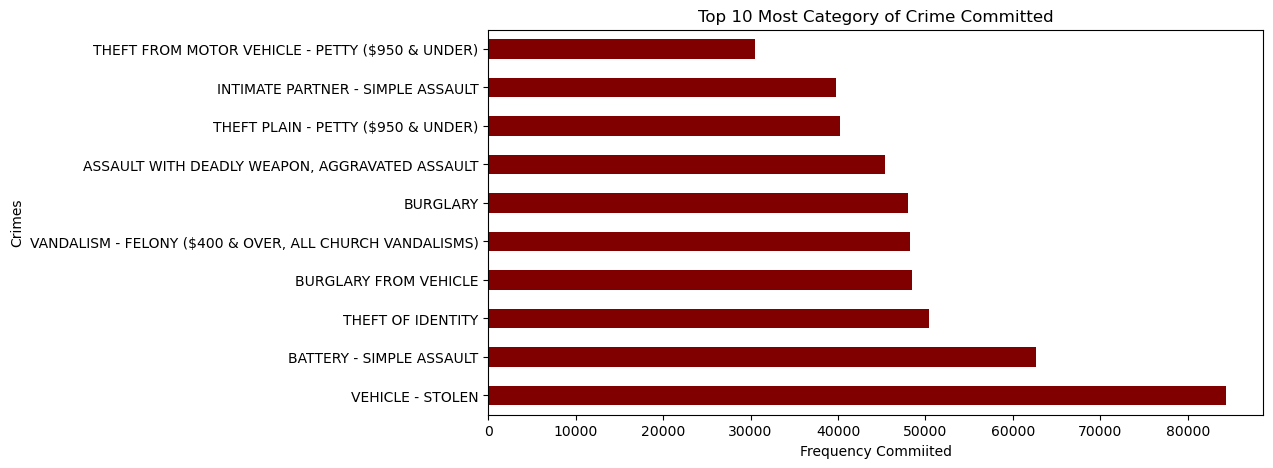

In [219]:
#Top 10 most Category of Crimes Committed

eda('Crm Cd Desc','barh', 'Top 10 Most Category of Crime Committed', 'Frequency Commiited', 'Crimes',
    10, 5, 'maroon', 10)

#### Time Series Analysis

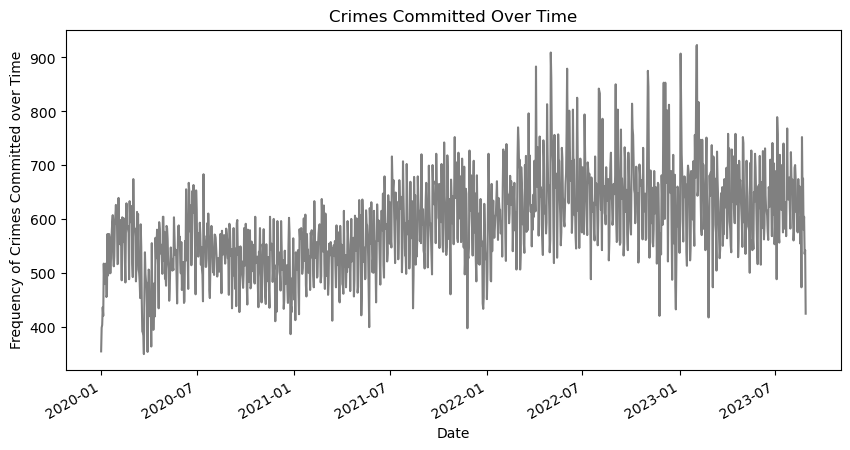

In [220]:
#Frequency of Crimes Committed Daily over Time

eda('DATE OCC', 'line', 'Crimes Committed Over Time', 'Date', 'Frequency of Crimes Committed over Time',
    10, 5, 'gray')

Text(0, 0.5, 'Frequency')

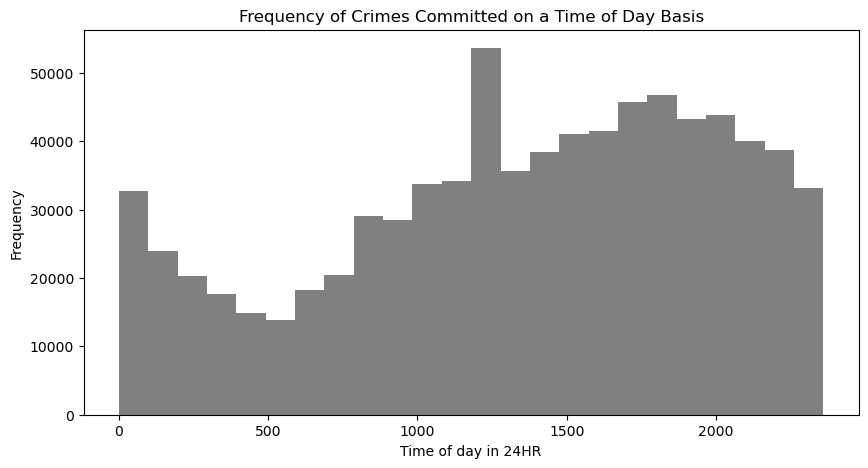

In [221]:
#Frequency of Crimes Commited by Time of Day

data['TIME OCC'].plot(kind = 'hist', bins = 24, color='grey', figsize = (10 ,5));
plt.title("Frequency of Crimes Committed on a Time of Day Basis")
plt.xlabel("Time of day in 24HR")
plt.ylabel("Frequency")

#### Distribution of Crimes Commited per Victim Sex

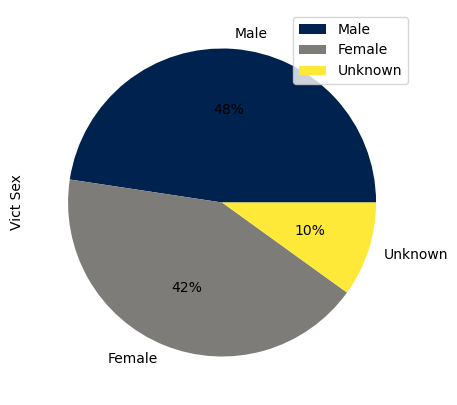

In [222]:
#Pie Chart to represent Victims Gender

data['Vict Sex'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', colormap='cividis', figsize = (15 ,5))

plt.legend()

#### Distribution of Victim Descent

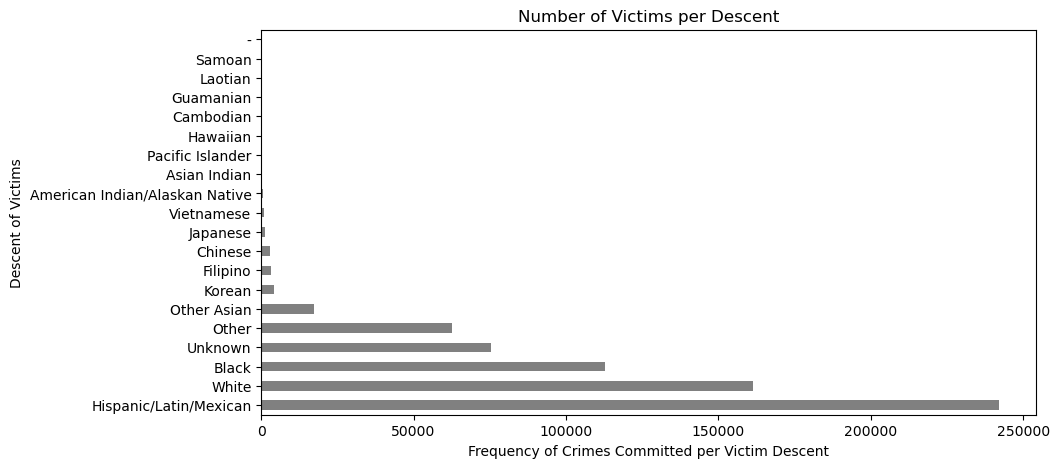

In [223]:
eda('Vict Descent', 'barh', 'Number of Victims per Descent', 'Frequency of Crimes Committed per Victim Descent', 'Descent of Victims',
    10, 5, 'gray')


#### Distribution by Area of Crime -  Top 10 Crime Area

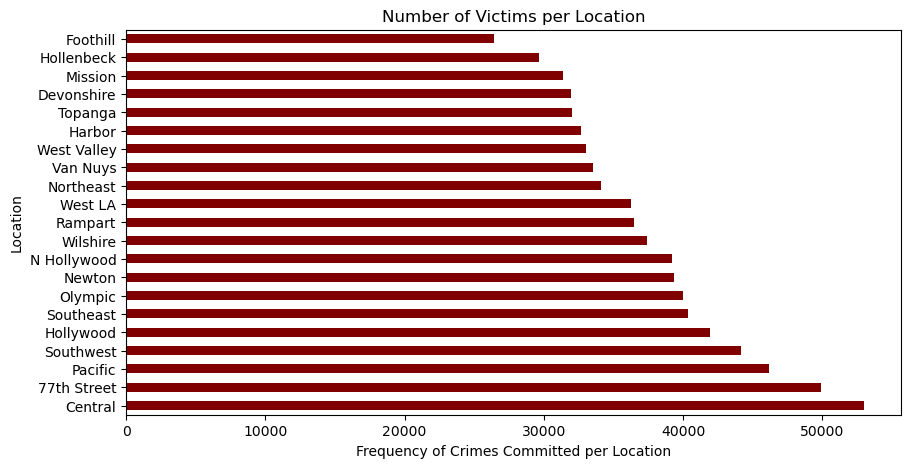

In [224]:

eda('AREA NAME', 'barh', 'Number of Victims per Location', 'Frequency of Crimes Committed per Location', 'Location',
    10, 5, 'maroon')

#### Distribution by Victim Age

Text(0, 0.5, 'Frequency of Victims')

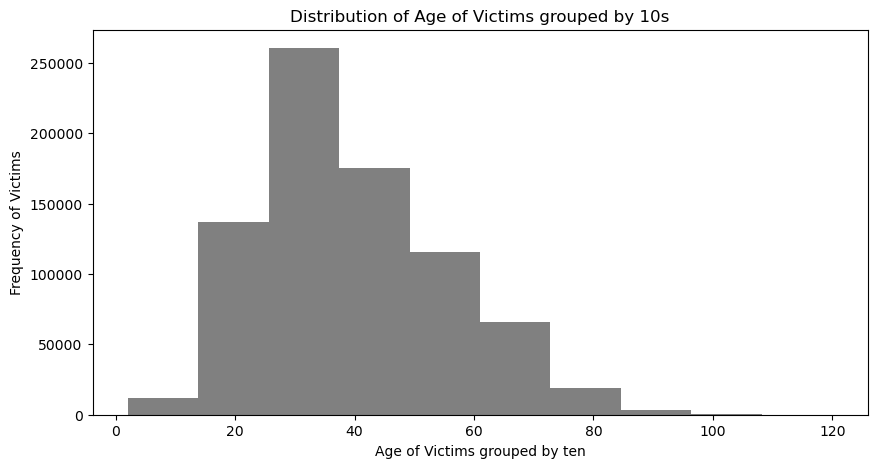

In [225]:
#Histogram Distribution of Victims by age grouped in tens

data['Vict Age'].plot(kind = 'hist', bins = 10, color='grey', figsize = (10 ,5));
plt.title("Distribution of Age of Victims grouped by 10s")
plt.xlabel("Age of Victims grouped by ten")
plt.ylabel("Frequency of Victims")

#### Distribution by Premises Crime Occured - Top 10

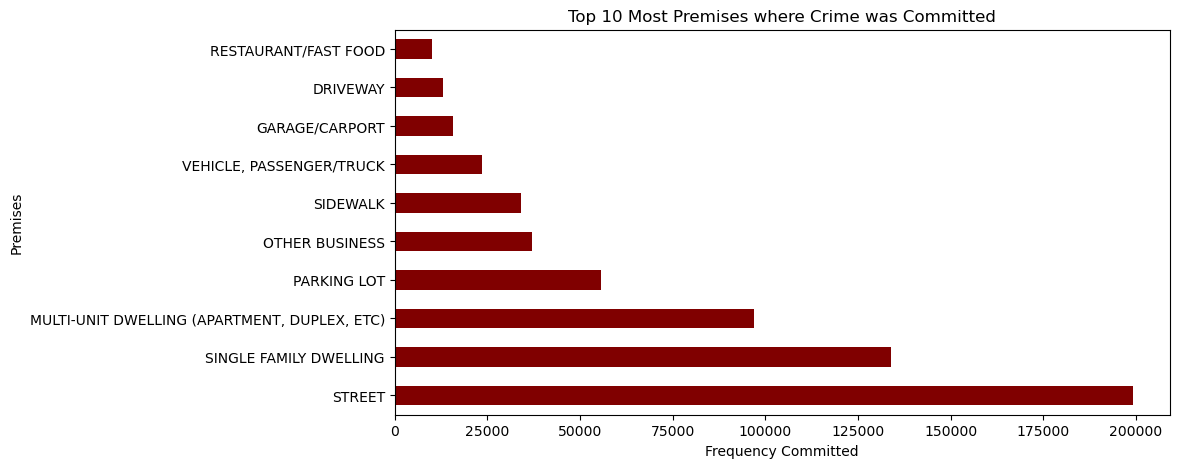

In [226]:
#Grpah Distribution of Premises where the top most crimes occurred

eda('Premis Desc', 'barh', 'Top 10 Most Premises where Crime was Committed', 'Frequency Committed', 'Premises',
    10, 5, 'maroon', 10)

#### Weapons Used

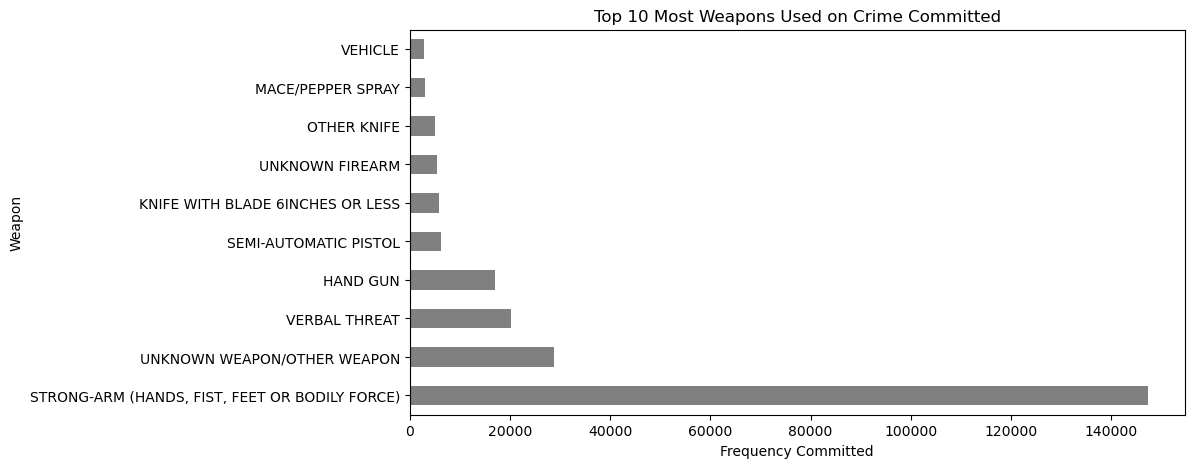

In [227]:
#Distribution of Weapons Used on Crimes

eda('Weapon Desc', 'barh', 'Top 10 Most Weapons Used on Crime Committed', 'Frequency Committed', 'Weapon',
    10, 5, 'grey', 10)

#### Status of the Crime Distro

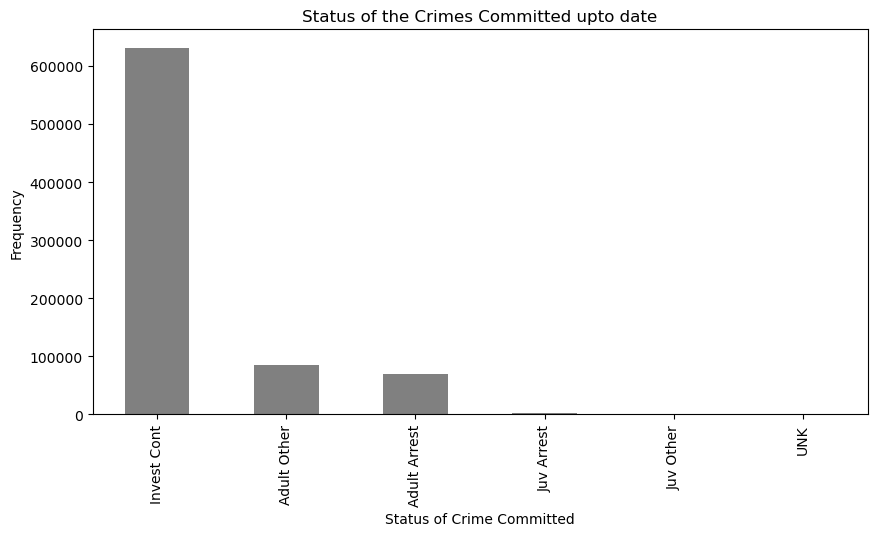

In [228]:
#Status of the Crimes Committed upto date

eda('Status Desc', 'bar', 'Status of the Crimes Committed upto date', 'Status of Crime Committed', 'Frequency',
    10, 5, 'grey', 10)


In [229]:
data.corr()

/tmp/ipykernel_4447/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,DR_NO,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR_NO,1.000000,-0.019326,0.046721,0.047061,-0.028984,0.000704,0.044827,0.004843,-0.028932,0.027370,0.030214,0.124482,0.040461,-0.039529
TIME OCC,-0.019326,1.000000,0.000848,0.000943,0.017339,-0.013571,-0.065278,-0.005456,0.017364,0.003229,-0.008228,-0.020932,0.002807,-0.002614
AREA,0.046721,0.000848,1.000000,0.999045,0.000183,0.028099,0.003007,-0.019712,-0.000034,-0.036802,0.035484,0.154033,0.022188,-0.009311
Rpt Dist No,0.047061,0.000943,0.999045,1.000000,0.000087,0.028112,0.002956,-0.019419,-0.000130,-0.037194,0.034639,0.155577,0.021956,-0.009233
Crm Cd,-0.028984,0.017339,0.000183,0.000087,1.000000,-0.004317,0.102653,0.374810,0.999295,0.002934,0.110149,0.044745,-0.043171,0.043258
Vict Age,0.000704,-0.013571,0.028099,0.028112,-0.004317,1.000000,0.017722,0.056842,-0.003640,0.089688,-0.035690,0.021170,-0.001035,0.001850
Premis Cd,0.044827,-0.065278,0.003007,0.002956,0.102653,0.017722,1.000000,0.208364,0.102591,-0.057414,-0.030212,0.022474,-0.007185,0.008233
Weapon Used Cd,0.004843,-0.005456,-0.019712,-0.019419,0.374810,0.056842,0.208364,1.000000,0.375663,-0.149298,-0.081265,0.050085,-0.010867,0.013306
Crm Cd 1,-0.028932,0.017364,-0.000034,-0.000130,0.999295,-0.003640,0.102591,0.375663,1.000000,0.024242,0.158481,-0.029025,-0.043241,0.043323
Crm Cd 2,0.027370,0.003229,-0.036802,-0.037194,0.002934,0.089688,-0.057414,-0.149298,0.024242,1.000000,0.280484,0.035351,-0.016895,0.017756
